# Window QPE on Sine Integral


This notebook presents the evaluation of **Window Quantum Phase Estimation** when used to compute the integral of a sine. 

The main idea is to use the **QQuantLib/finance/quantum_integration** (see notebook *10_ApplicationTo_Finance_01_IntegralComputing.ipynb*) for computing the defined integral of a *sine* function in the domain $\left[0, \frac{3\pi}{8}\right]$. 

The **benchmark/qae_sine_integral** module allows the user to execute this case in an easy way by providing previously configured *JSON* files.


## 1. benchmark/qae_sine_integral.py 


This script loads the *sine* function between 2 different intervals:

* $\left[0, \frac{3\pi}{8}\right]$ this is the interval 0.
* $\left[\pi, \frac{5\pi}{4}\right]$ this is the interval 1.

into a quantum circuit and codify the corresponding integrals into the amplitude of a quantum state allowing the use of different **Amplitude Estimation (AE)** algorithms for estimating it. 

The script can be executed from the command line. 

For getting a help use:

    python qae_sine_integral.py -h
    
    usage: qae_sine_integral.py [-h] [-n_qbits N_QBITS] [-interval INTERVAL] [-repetitions REPETITIONS] [-id ID] [-json_ae JSON_AE] [-json_qpu JSON_QPU] [-folder FOLDER_PATH] [--count]
                                [--print] [--save] [--exe]

    optional arguments:
      -h, --help            show this help message and exit
      -n_qbits N_QBITS      Number of qbits for interval discretization.
      -interval INTERVAL    Integration Interval. valid Values 0 or 1
      -repetitions REPETITIONS
                            Number of repetitions the integral will be computed.Default: 1
      -id ID                For executing only one element of the list
      -json_ae JSON_AE      JSON AE algorithm configuration
      -json_qpu JSON_QPU    JSON with the qpu configuration
      -folder FOLDER_PATH   Path for storing folder
      --count               For counting elements on the list
      --print               For printing the AE algorihtm configuration.
      --save                For saving results
      --exe                 For executing program


The different arguments allows to the user configure the estimation problem. 


### 1.2. Configuring the AE algorithm

The **AE** algorithm (any implemented under the package **QQuantLib.AE**) used for estimating the integral, and its corresponding configuration should be provided as a properly configured **JSON** file (**-json_ae** argument)

The *jsons/qae_sine_pattern.json* can be used as a pattern for configuring **AE** algorithms properly. Several examples of *JSON* files for configuring different **AE** algorithms can be found inside **jsons/** folder. With one **JSON** the user can configure several **AE** configurations and even different **AE** algorithms. 

**EXAMPLE**

The user can provide a **JSON** file with the following configurations:

    [
        {
            "ae_type": ["IQAE"],

            "schedule": [null],
            "delta": [null],
            "ns": [null],

            "auxiliar_qbits_number": [null],
            "window" : [null],
            "kaiser_alpha" : [null],

            "cbits_number": [null],

            "epsilon": [0.01, 0.001],

            "alpha": [0.05, 0.01],

            "gamma": [null],
            "q": [null],
            "erqae_schedule" : [null],

            "multiplexor":  [true],

            "mcz_qlm": [false],
            "shots": [10000]
        },
        {
            "ae_type": ["mIQAE"],

            "schedule": [null],
            "delta": [null],
            "ns": [null],

            "auxiliar_qbits_number": [null],
            "window" : [null],
            "kaiser_alpha" : [null],

            "cbits_number": [null],

            "epsilon": [0.001],

            "alpha": [0.05],

            "gamma": [null],
            "q": [null],
            "erqae_schedule" : [null],

            "multiplexor":  [true],

            "mcz_qlm": [false],
            "shots": [10000, 100]
        }
    ]
    
In this case the user would implement the following configurations:

* IQAE algorithm with the following configurations:
    * epsilon: 0.01, alpha: 0.05, shots: 10000
    * epsilon: 0.01, alpha: 0.01, shots: 10000    
    * epsilon: 0.001, alpha: 0.05, shots: 10000    
    * epsilon: 0.001, alpha: 0.01, shots: 10000     
* mIQAE algorithm with the following configurations:
    * epsilon: 0.001, alpha: 0.05, shots: 10000    
    * epsilon: 0.001, alpha: 0.05, shots: 100    
    
    
### 1.3. Configuring the QPU

The **QPU** used for solving/simulating the different quantum circuits, the **AE** algorithm generates, should be configured as a **JSON** file provided to the **-json_qpu** argument.

Different **QPUs** (even noisy *QPU*s using *EVIDEN QAPTIVA* stack) can be configured (see Notebook: *00_AboutTheNotebooksAndQPUs.ipynb*). The *jsons/qpu_ideal.json* file can be used as a pattern for configuring QPUs


### 1.4. Getting the number of cases to execute.  

Providing to the command line execution of *qae_sine_integral.py* the argument **--count** the script will return the total number of executions it should be done for complete execution of a given **AE JSON** file configuration. For example, if executing:

    python qae_sine_integral.py -n_qbits 6 -interval 0  -json_qpu jsons/qpu_ideal.json -json_ae jsons/qae_sine_cqpeae.json --count
    
The command will return 72. So 72 **AE** configurations were set in the *jsons/qae_sine_cqpeae.json* files. 

### 1.5 Print a complete configuration of a case.

To print the complete configuration of an **AE** case the user should use the **--print** argument with the *-id* argument followed by the desired use case. For example:

    python qae_sine_integral.py -n_qbits 6 -interval 0  -json_qpu jsons/qpu_ideal.json -json_ae jsons/qae_sine_cqpeae.json -id 10 --print
    
will return the complete configuration for the 10 case:

    {'ae_type': 'CQPEAE', 'schedule': None, 'delta': None, 'ns': None, 'auxiliar_qbits_number': 5, 'window': None, 'kaiser_alpha': 10, 'cbits_number': None, 'epsilon': None, 'alpha': None, 'gamma': None, 'q': None, 'erqae_schedule': None, 'multiplexor': True, 'mcz_qlm': False, 'shots': 0, 'qpu_type': 'c', 't_gate_1qb': None, 't_gate_2qbs': None, 't_readout': None, 'depol_channel': {'active': False, 'error_gate_1qb': None, 'error_gate_2qbs': None}, 'idle': {'amplitude_damping': False, 'dephasing_channel': False, 't1': None, 't2': None}, 'meas': {'active': False, 'readout_error': None}}
    
### 1.6 Execute  a complete configuration of a case

For executing an **AE** user case the user should use the **--exe** argument with the desired case to execute provided to the argument **-id**
.

## 2. Performance comparison of Window QPE.


Now we present the performance comparison of different **Window QPE** for computing the integral of the sine in the $\left[0, \frac{3\pi}{8}\right]$ domain interval.

The configuration was the following:

* Discretization for the domain for the integral: 6 qubits
* Exact integral:0.617317
* Riemman Sum over a 6-qubit domain discretization: 0.617299
* QPU: ideal simulation using CLinaAlg
* Tested QPE: Hadamard (traditional QPE), Sine and Kaiser.
* Different $\alpha_{Kaiser}$ were tested.

All the results were obtained using the **qae_sine_integral.py** python script.

### 2.1 Exact simulation.

In this case the number of shots is set to zero so the exact probabilities are computed:

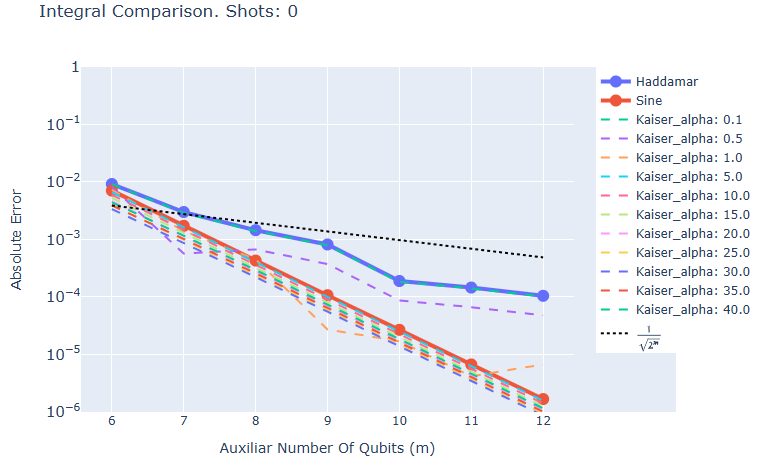


As can be seen for the same number of auxiliary qubits $m$ the absolute error (absolute difference between quantum estimation and Rieman sum over 6-qubits discretization) decreases when using a *Sine window function* or a properly configured *Kaiser window function* with respect to *Hadamard* (traditional **QPE**). 

For a large number of auxiliary qubits *Sine* and *Kaiser* could need even 2 qubits less than traditional **QPE** for the same absolute error.

The *Kaiser window function* theoretical performance is better than *sine* when it is properly configured (i.e. when a good $\alpha_{Kaiser}$ is provided).

### 2.2 Shots Simulation.

The following graph shows the absolute error vs the number of auxiliary qubits when 10000 shots are simulated (in this case we present the median over 10 different repetitions).

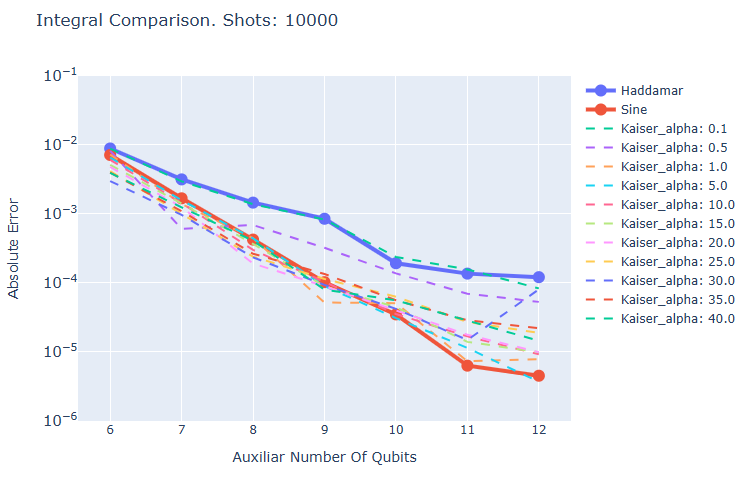



When shots are required the sine function shows a more stable perfomance than *Kaiser* windows (both of them have better perfromances than Hadamard). This performance decrease for *Kaiser windows* is due to the lower number of shots required. 

When the number of shots is increased the *Kaiser window* (properly configured) shows a slightly better performance than the *Sine window* as can be seen in the following graphs (where we presented the mean of the abolute error for 50 repetitions).

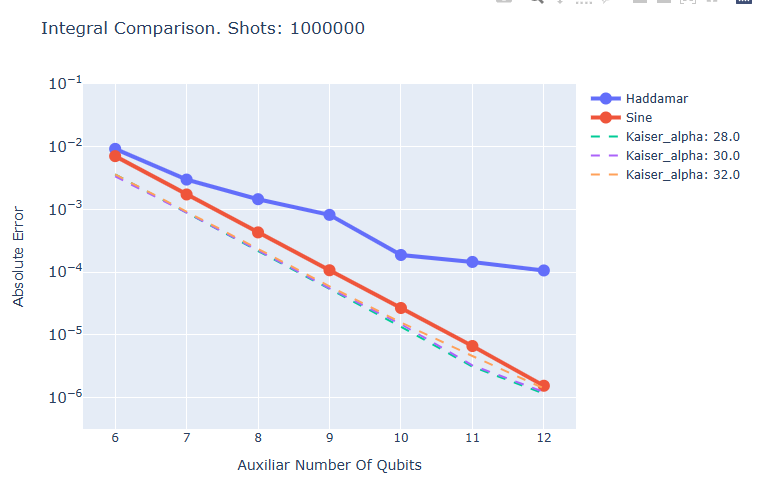


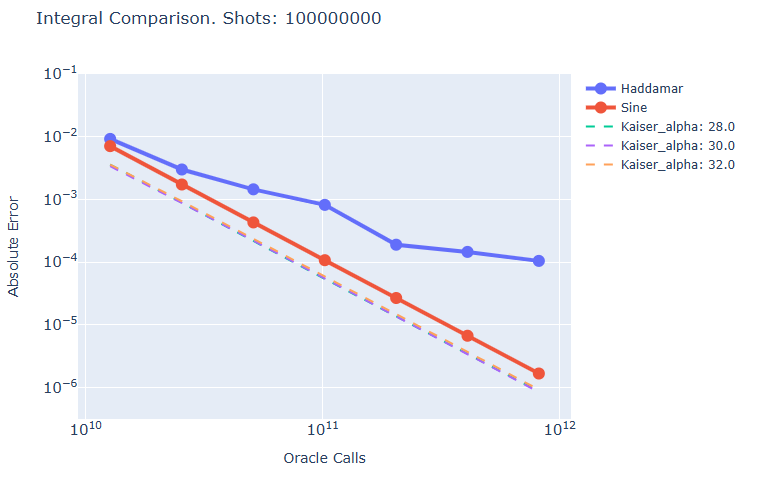

Both window functions outperform the traditional QPE.
